In [ ]:
from google.colab import files

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d ealaxi/paysim1

 98% 175M/178M [00:00<00:00, 190MB/s]
100% 178M/178M [00:00<00:00, 193MB/s]


In [ ]:
! unzip paysim1.zip

Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
import pandas as pd
import matplotlib as plot
import numpy as np

In [ ]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")


In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.columns.values.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Size' column
df['type'] = encoder.fit_transform(df['type'])
df['nameOrig'] = encoder.fit_transform(df['nameOrig'])
df['nameDest'] = encoder.fit_transform(df['nameDest'])

# Display the DataFrame
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['isFraud','isFlaggedFraud'], axis=1), df['isFraud'], test_size=0.2)

In [ ]:
#####BEFORE RESAMPLING

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset and preprocess it
# Replace X and y with your feature matrix and target labels
# Example:
# X = your_feature_data
# y = your_target_labels

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report for more detailed metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9996558021695465
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906228
           1       0.88      0.86      0.87      2558

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
####AFTER RESAMPLING

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, recall_score
from imblearn.over_sampling import SMOTE  # Using SMOTE for oversampling


# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop(['isFraud','isFlaggedFraud'], axis=1), df['isFraud'], test_size=0.2)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train1, y_train1)

# Train a DT classifier (you can use any classifier of your choice)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test1)

# Evaluate the model's recall score
recall1 = recall_score(y_test1, y_pred)

# Print the classification report and recall score
print("Classification Report:")
print(classification_report(y_test1, y_pred))
print(f"Recall Score: {recall1:.2f}")

# To further fine-tune or adjust hyperparameters, you can use grid search or other optimization techniques.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270861
           1       0.63      0.96      0.76      1663

    accuracy                           1.00   1272524
   macro avg       0.82      0.98      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524

Recall Score: 0.96


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
c = df.corr()

<Axes: >

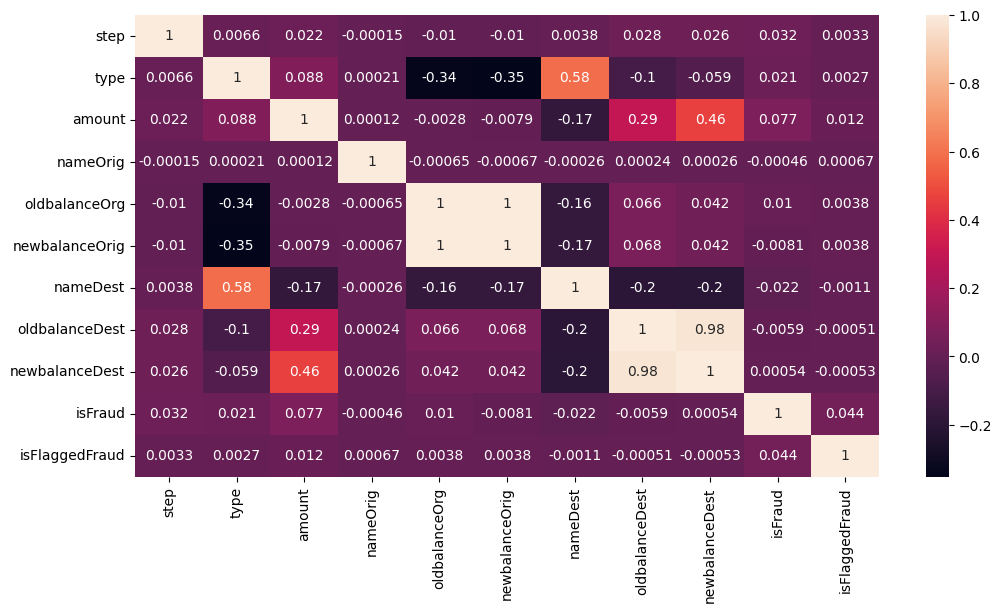

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(c,annot=True)

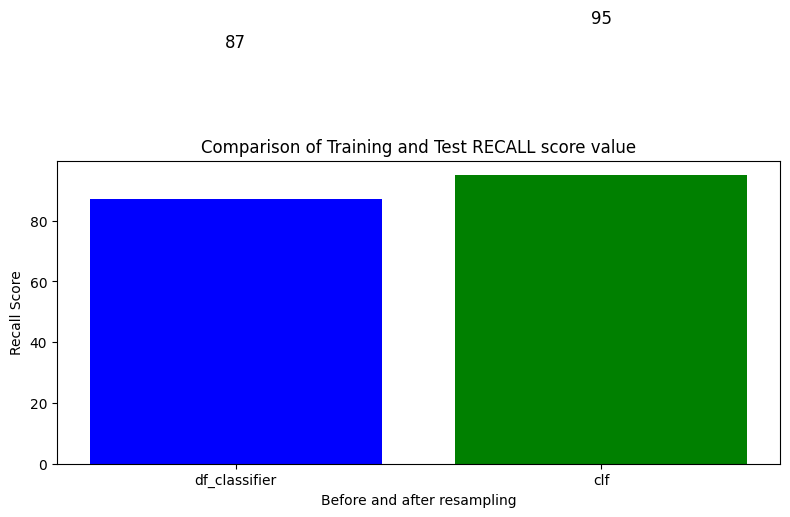

In [ ]:
models = ['df_classifier','clf']
scores = [87,95]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, scores, color=['blue', 'green'],annot=True)
plt.xlabel('Before and after resampling')
plt.ylabel('Recall Score')
plt.title('Comparison of Training and Test RECALL score value')
plt.xticks(rotation=0)

# Display data sizes on top of the bars
for i, size in enumerate(scores):
    plt.text(i, size + 50, str(size), ha='center', fontsize=12)

plt.tight_layout()
plt.show()